# Importing Packages

In [453]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt 
import sys

# Reading in the Data

In [472]:
mas = "https://raw.githubusercontent.com/mbsilverman10/FinalProject/master/"
url1 = "basketball_draft.csv"
url2 = "basketball_hof.csv"
url3 = "basketball_players.csv"
url4 = "basketball_master.csv"
df1 = pd.read_csv(mas+url1)
df2 = pd.read_csv(mas+url2)
df3 = pd.read_csv(mas+url3)
df4 = pd.read_csv(mas+url4)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Merging Draft and Player Data

In [473]:
hofdf = df1.merge(df3,left_on='playerID',right_on='playerID',how='inner') 
#First we merge the draft and player data sets on the shared column playerID
hofdf = hofdf[hofdf.draftYear > 1976] 
#We are limiting our draft year to after 1980.
#hofdf3 = hofdf2[hofdf.draftRound==1]
#We are limiting our draft round to just the first.
#hofdf3 = hofdf3[hofdf.draftSelection < 15]
#Then we are limiting our draft selection to 1-14.
hofdf

,draftYear,draftRound,draftSelection,draftOverall,tmID_x,firstName,lastName,suffixName,playerID,draftFrom,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
7108,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,0,0,0,0,0,0,0,0,0,NaN
7109,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,0,0,0,0,0,0,0,0,0,NaN
7110,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,0,0,0,0,0,0,0,0,0,NaN
7111,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,0,0,0,0,0,0,0,0,0,NaN
7112,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,1,24,22,169,90,57,43,0,0,NaN
7113,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,19,25,34,200,102,33,25,2,1,NaN
7114,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,0,0,0,0,0,0,0,0,0,NaN
7115,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,4,9,19,78,44,24,21,1,0,NaN
7116,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,3,10,8,52,21,10,5,0,0,NaN
7117,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,0,0,0,0,0,0,0,0,0,NaN


# Adding in Hall of Fame Data

In [491]:
hofdf["Full_Name"]= hofdf["firstName"]+ " " + hofdf["lastName"] 
#We have to create a "name" column in the previous merge so we can successfully fold in the HoF data on this column.
df2a = df2.rename(columns={"name": "Full_Name"})
hofdf4 = hofdf.merge(df2a, left_on='Full_Name', right_on='Full_Name', how='left')
#Now we can merge in the HoF data on the newly created "name" column.
hofdf4

,draftYear,draftRound,draftSelection,draftOverall,tmID_x,firstName,lastName,suffixName,playerID,draftFrom,...,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note,Full_Name,year_y,hofID,category
0,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,0,0,0,0,0,NaN,Mike Mitchell,NaN,NaN,NaN
1,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,0,0,0,0,0,NaN,Mike Mitchell,NaN,NaN,NaN
2,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,0,0,0,0,0,NaN,Mike Mitchell,NaN,NaN,NaN
3,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,0,0,0,0,0,NaN,Mike Mitchell,NaN,NaN,NaN
4,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,90,57,43,0,0,NaN,Mike Mitchell,NaN,NaN,NaN
5,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,102,33,25,2,1,NaN,Mike Mitchell,NaN,NaN,NaN
6,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,0,0,0,0,0,NaN,Mike Mitchell,NaN,NaN,NaN
7,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,44,24,21,1,0,NaN,Mike Mitchell,NaN,NaN,NaN
8,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,21,10,5,0,0,NaN,Mike Mitchell,NaN,NaN,NaN
9,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,0,0,0,0,0,NaN,Mike Mitchell,NaN,NaN,NaN


# Draft Selection vs. Points Scored

The following is a scatterplot with points scored on the y axis and the player's draft selection number on the x axis. There is no apparent correlation among these two variables:

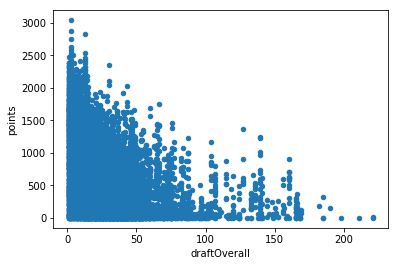

In [492]:
hofdf4.plot.scatter(x="draftOverall",y="points")

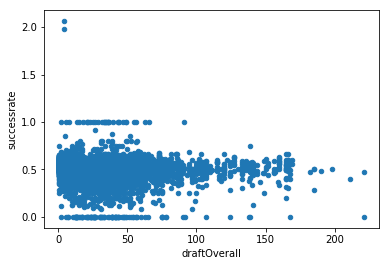

In [493]:
hofdf4["success"]= hofdf4["fgMade"]+hofdf4["ftMade"] 
hofdf4["attempted"]= hofdf4["fgAttempted"]+hofdf4["ftAttempted"] 
hofdf4["successrate"]= hofdf4["success"]/hofdf4["attempted"] 
hofdf4.plot.scatter(x="draftOverall",y="successrate")

In [495]:
hofdf4["successrate"].mean()

0.5044857341826713

In [397]:
#df20 = df2[df2["category"]=="Player"]
#df20

In [496]:
%%time
pp=hofdf4
qq=df4

CPU times: user 1.07 ms, sys: 2.17 ms, total: 3.24 ms
Wall time: 9.17 ms


In [497]:
#pp=pp[pp.year>=1976]
#pp['lgID'].value_counts()

In [498]:
print(pp.columns,qq.columns)

Index(['draftYear', 'draftRound', 'draftSelection', 'draftOverall', 'tmID_x',
       'firstName', 'lastName', 'suffixName', 'playerID', 'draftFrom',
       'lgID_x', 'year_x', 'stint', 'tmID_y', 'lgID_y', 'GP', 'GS', 'minutes',
       'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted',
       'ftMade', 'threeAttempted', 'threeMade', 'PostGP', 'PostGS',
       'PostMinutes', 'PostPoints', 'PostoRebounds', 'PostdRebounds',
       'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks',
       'PostTurnovers', 'PostPF', 'PostfgAttempted', 'PostfgMade',
       'PostftAttempted', 'PostftMade', 'PostthreeAttempted', 'PostthreeMade',
       'note', 'Full_Name', 'year_y', 'hofID', 'category', 'success',
       'attempted', 'successrate'],
      dtype='object') Index(['bioID', 'useFirst', 'firstName', 'middleName', 'lastName', 'nameGiven',
       'fullGivenName', 'nameSuffix', 'nameNick', 'pos', 'firs

In [499]:
pq=pp.merge(qq, left_on='playerID',right_on= 'bioID', how='left' )
pq

,draftYear,draftRound,draftSelection,draftOverall,tmID_x,firstName_x,lastName_x,suffixName,playerID,draftFrom,...,birthDate,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,deathDate,race
0,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,1956-01-01,Atlanta,GA,USA,Price,Atlanta,GA,USA,2011-06-09,B
1,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,1956-01-01,Atlanta,GA,USA,Price,Atlanta,GA,USA,2011-06-09,B
2,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,1956-01-01,Atlanta,GA,USA,Price,Atlanta,GA,USA,2011-06-09,B
3,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,1956-01-01,Atlanta,GA,USA,Price,Atlanta,GA,USA,2011-06-09,B
4,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,1956-01-01,Atlanta,GA,USA,Price,Atlanta,GA,USA,2011-06-09,B
5,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,1956-01-01,Atlanta,GA,USA,Price,Atlanta,GA,USA,2011-06-09,B
6,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,1956-01-01,Atlanta,GA,USA,Price,Atlanta,GA,USA,2011-06-09,B
7,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,1956-01-01,Atlanta,GA,USA,Price,Atlanta,GA,USA,2011-06-09,B
8,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,1956-01-01,Atlanta,GA,USA,Price,Atlanta,GA,USA,2011-06-09,B
9,1978,1,15,15,CLE,Mike,Mitchell,NaN,mitchmi01,Auburn,...,1956-01-01,Atlanta,GA,USA,Price,Atlanta,GA,USA,2011-06-09,B


In [500]:
print(pp.shape,qq.shape, pq.shape)

(12242, 59) (5061, 26) (12242, 85)


In [449]:
#pq['Full_Name'] = pq['firstName'] + ' ' + pq['lastName']

In [501]:
pq.columns

Index(['draftYear', 'draftRound', 'draftSelection', 'draftOverall', 'tmID_x',
       'firstName_x', 'lastName_x', 'suffixName', 'playerID', 'draftFrom',
       'lgID_x', 'year_x', 'stint', 'tmID_y', 'lgID_y', 'GP', 'GS', 'minutes',
       'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted',
       'ftMade', 'threeAttempted', 'threeMade', 'PostGP', 'PostGS',
       'PostMinutes', 'PostPoints', 'PostoRebounds', 'PostdRebounds',
       'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks',
       'PostTurnovers', 'PostPF', 'PostfgAttempted', 'PostfgMade',
       'PostftAttempted', 'PostftMade', 'PostthreeAttempted', 'PostthreeMade',
       'note', 'Full_Name', 'year_y', 'hofID', 'category', 'success',
       'attempted', 'successrate', 'bioID', 'useFirst', 'firstName_y',
       'middleName', 'lastName_y', 'nameGiven', 'fullGivenName', 'nameSuffix',
       'nameNick', 'pos', 'firstseason', 'last

# Create new DataFrame with select columns

In [502]:
Reg_season=pq[['Full_Name','GP','minutes','rebounds','assists','steals','blocks','turnovers','PF','fgAttempted',
         'fgMade','ftAttempted','ftMade','threeAttempted','threeMade']]
Reg_season

,Full_Name,GP,minutes,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade
0,Mike Mitchell,80,1576,329,60,51,29,102,215,706,362,178,131,0,0
1,Mike Mitchell,82,2802,591,93,70,77,172,259,1482,775,343,270,6,0
2,Mike Mitchell,82,3194,502,139,63,52,175,199,1791,853,385,302,9,4
3,Mike Mitchell,27,973,141,39,27,15,55,77,504,229,100,72,6,0
4,Mike Mitchell,57,2090,449,43,33,28,98,200,973,524,202,148,1,0
5,Mike Mitchell,80,2803,537,98,57,52,126,248,1342,686,289,219,3,0
6,Mike Mitchell,79,2853,570,93,62,73,141,251,1597,779,353,275,14,6
7,Mike Mitchell,82,2853,417,151,61,27,144,219,1558,775,346,269,23,5
8,Mike Mitchell,82,2970,409,188,56,25,184,175,1697,802,392,317,12,0
9,Mike Mitchell,40,922,103,38,19,9,51,68,478,208,112,92,2,1


# Aggregating the Data

In [503]:

GP=Reg_season.groupby('Full_Name', as_index=False)['GP'].aggregate('sum')
Minutes=Reg_season.groupby('Full_Name', as_index=False)['minutes'].aggregate('sum')
Rebounds=Reg_season.groupby('Full_Name', as_index=False)['rebounds'].aggregate('sum')
Assists=Reg_season.groupby('Full_Name', as_index=False)['assists'].aggregate('sum')
Steals=Reg_season.groupby('Full_Name', as_index=False)['steals'].aggregate('sum')
Blocks=Reg_season.groupby('Full_Name', as_index=False)['blocks'].aggregate('sum')
Turnovers=Reg_season.groupby('Full_Name', as_index=False)['turnovers'].aggregate('sum')
PFouls=Reg_season.groupby('Full_Name', as_index=False)['PF'].aggregate('sum')

FG_Made = Reg_season.groupby('Full_Name',as_index=False)['fgMade'].aggregate('sum')
FG_Attempted = Reg_season.groupby('Full_Name',as_index=False)['fgAttempted'].aggregate('sum')
FT_Made = Reg_season.groupby('Full_Name',as_index=False)['ftMade'].aggregate('sum')
FT_Attempted = Reg_season.groupby('Full_Name',as_index=False)['ftAttempted'].aggregate('sum')
Three_Made = Reg_season.groupby('Full_Name',as_index=False)['threeMade'].aggregate('sum')
Three_Attempted = Reg_season.groupby('Full_Name',as_index=False)['threeAttempted'].aggregate('sum')

#Here, we are aggregating the data for the years specified. We are doing this because stats are listed for individual years. Therefore, we can run our metrics after aggregating the data.



### We are now merging the each aggregated section to create a new DataFrame. This way each player will only have one entry associated with his name. In the previous DataFrames there were multiple entries for players for each respective year played. We will also add three new columns for Field Goal, Free Throw, and Three point precentage after the merging is done. This will give us all the criteria on which we will run our metrics for this section.

In [504]:

### Create new DataFrame with aggregated values above
New_DF=GP.merge(Minutes, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF=New_DF.merge(Rebounds, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF=New_DF.merge(Assists, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF=New_DF.merge(Steals, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF=New_DF.merge(Blocks, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF=New_DF.merge(Turnovers, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF=New_DF.merge(PFouls, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF=New_DF.merge(FG_Made, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF=New_DF.merge(FG_Attempted, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF=New_DF.merge(FT_Made, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF=New_DF.merge(FT_Attempted, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF=New_DF.merge(Three_Made, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF=New_DF.merge(Three_Attempted, left_on='Full_Name',right_on= 'Full_Name', how='inner' )


New_DF['FG_PCT']=New_DF['fgMade']/New_DF['fgAttempted']
New_DF['FT_PCT']=New_DF['ftMade']/New_DF['ftAttempted']
New_DF['Three_PCT']=New_DF['threeMade']/New_DF['threeAttempted']
New_DF

New_DF.sort_values('Three_PCT', ascending=False).head()

,Full_Name,GP,minutes,rebounds,assists,steals,blocks,turnovers,PF,fgMade,fgAttempted,ftMade,ftAttempted,threeMade,threeAttempted,FG_PCT,FT_PCT,Three_PCT
580,Eric White,55,788,132,26,17,4,47,72,128,244,79,99,1,1,0.524590,0.797980,1.0
1479,Ron Rowan,7,16,1,1,4,0,3,1,4,9,3,4,1,1,0.444444,0.750000,1.0
1735,Tyson Wheeler,1,3,0,2,0,0,0,1,1,1,1,2,1,1,1.000000,0.500000,1.0
630,Georgi Glouchkov,49,772,163,32,26,25,76,124,84,209,70,122,1,1,0.401914,0.573770,1.0
553,Eddy Curry,525,13086,2721,287,155,384,1171,1555,2574,4726,1661,2584,2,2,0.544647,0.642802,1.0


### Get stats for various criteria to determine right sample size. For example, there are some players who have only attempted and made 2 out of 2 three shots. They are not three point shooters normally. But they could have played a large number of games and minutes. Therefore, these need to be excluded from the sample size.

In [505]:
  New_DF[['minutes','GP','threeAttempted','ftAttempted','fgAttempted']].describe()

,minutes,GP,threeAttempted,ftAttempted,fgAttempted
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,8477.963656,349.830947,406.414097,936.107379,2950.816079
std,10198.608194,336.170892,829.666429,1382.694824,3960.437281
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,669.500000,64.000000,3.750000,59.000000,208.000000
50%,3795.000000,230.000000,33.000000,350.500000,1165.500000
75%,13405.500000,586.000000,347.250000,1242.250000,4234.250000
max,61845.000000,2009.000000,6788.000000,13188.000000,26471.000000


## Assumptions
* We are taking the 75% distribution for minutes and GP.
* We are taking default values of 2000 for threeAttempted, 4000 for ftAttempted and 10000 for fgAttempted as the disaprity between 75% and the max number is quite large.  We feel this will best help eliminate the noise.
### The user has the ability to change these criteria as we are making the code dynamic. This way the results can be interpreted from different angles.

In [506]:
Minimum_Minutes=input('Please enter Minutes:')
Minimum_Games=input('Please enter Games:')
Minimum_threeAttempted=input('Please enter threeAttempted:')
Minimum_ftAttempted=input('Please enter ftAttempted:')
Minimum_fgAttempted=input('Please enter fgAttempted:')

Please enter Minutes:
Please enter Games:
Please enter threeAttempted:
Please enter ftAttempted:
Please enter fgAttempted:


In [507]:
print(Minimum_Minutes,Minimum_Games,Minimum_threeAttempted,Minimum_ftAttempted,Minimum_fgAttempted, sep='  /   ')

  /     /     /     /   


In [508]:


if Minimum_Minutes=='':
    Minimum_Minutes=10951
if Minimum_Games== '':
    Minimum_Games=501
if Minimum_ftAttempted=='':
    Minimum_ftAttempted=4000
if Minimum_fgAttempted=='':
    Minimum_fgAttempted=10000
if Minimum_threeAttempted=='':
    Minimum_threeAttempted=2000
    
print(Minimum_Minutes,Minimum_Games,Minimum_threeAttempted,Minimum_ftAttempted,Minimum_fgAttempted, sep= '  /  ')

10951  /  501  /  2000  /  4000  /  10000


In [509]:
New_DF.columns

Index(['Full_Name', 'GP', 'minutes', 'rebounds', 'assists', 'steals', 'blocks',
       'turnovers', 'PF', 'fgMade', 'fgAttempted', 'ftMade', 'ftAttempted',
       'threeMade', 'threeAttempted', 'FG_PCT', 'FT_PCT', 'Three_PCT'],
      dtype='object')

In [510]:
### Change String entries to Integers
Minimum_Minutes=int(Minimum_Minutes)
Minimum_Games=int(Minimum_Games)
Minimum_ftAttempted=int(Minimum_ftAttempted)
Minimum_fgAttempted=int(Minimum_fgAttempted)
Minimum_threeAttempted=int(Minimum_threeAttempted)


In [511]:
## Create New DataFrame based on criteria specified

New_DF=New_DF[New_DF.minutes>=Minimum_Minutes]
New_DF=New_DF[New_DF.GP>=Minimum_Games]
New_DF=New_DF[New_DF.ftAttempted>=Minimum_ftAttempted]
New_DF=New_DF[New_DF.fgAttempted>=Minimum_fgAttempted]
New_DF=New_DF[New_DF.threeAttempted>=Minimum_threeAttempted]

New_DF.shape

(27, 18)

In [512]:
New_DF.sort_values('GP', ascending=True).head()

,Full_Name,GP,minutes,rebounds,assists,steals,blocks,turnovers,PF,fgMade,fgAttempted,ftMade,ftAttempted,threeMade,threeAttempted,FG_PCT,FT_PCT,Three_PCT
1066,LeBron James,689,27500,4943,4751,1194,582,2299,1329,6794,14057,4540,6082,917,2772,0.483318,0.746465,0.330808
1596,Stephon Marbury,846,31894,2516,6471,1022,121,2547,2014,5769,13324,3768,4804,991,3048,0.432978,0.784346,0.325131
1059,Latrell Sprewell,913,35269,3724,3664,1294,396,2450,1689,6076,14294,3456,4298,1104,3272,0.425073,0.804095,0.337408
38,Allen Iverson,914,37586,3394,5624,1983,164,3263,1777,8467,19906,6375,8168,1059,3383,0.425349,0.780485,0.313036
832,Jerry Stackhouse,933,29677,3034,3205,862,433,2617,1779,5320,13010,4629,5636,958,3113,0.408916,0.821327,0.307742


In [513]:
New_DF.sort_values('minutes', ascending=True).head()

,Full_Name,GP,minutes,rebounds,assists,steals,blocks,turnovers,PF,fgMade,fgAttempted,ftMade,ftAttempted,threeMade,threeAttempted,FG_PCT,FT_PCT,Three_PCT
1066,LeBron James,689,27500,4943,4751,1194,582,2299,1329,6794,14057,4540,6082,917,2772,0.483318,0.746465,0.330808
832,Jerry Stackhouse,933,29677,3034,3205,862,433,2617,1779,5320,13010,4629,5636,958,3113,0.408916,0.821327,0.307742
1516,Sam Cassell,994,29810,3221,5939,1058,163,2419,2744,5698,12558,3567,4144,672,2029,0.453735,0.860763,0.331198
1704,Tracy McGrady,938,30659,5276,4161,1136,807,2029,1662,6709,15413,3882,5202,1081,3197,0.435282,0.746251,0.338129
1596,Stephon Marbury,846,31894,2516,6471,1022,121,2547,2014,5769,13324,3768,4804,991,3048,0.432978,0.784346,0.325131


In [514]:
# Create DataFrames to Merge for Arithmetic Operations

#FG_Made = Reg_season.groupby('Full_Name',as_index=False)['fgMade'].aggregate('sum')
#FG_Made=FG_Made.to_frame()

#FG_Attempted = Reg_season.groupby('Full_Name',as_index=False)['fgAttempted'].aggregate('sum')
#FG_Attempted=FG_Attempted.to_frame()

#FT_Made = Reg_season.groupby('Full_Name',as_index=False)['ftMade'].aggregate('sum')
#FT_Made=FT_Made.to_frame()

#FT_Attempted = Reg_season.groupby('Full_Name',as_index=False)['ftAttempted'].aggregate('sum')
#FT_Attempted=FT_Attempted.to_frame()




In [515]:
New_DF.dropna().shape

(27, 18)

In [516]:
New_DF.sort_values('FT_PCT', ascending=False).head()

,Full_Name,GP,minutes,rebounds,assists,steals,blocks,turnovers,PF,fgMade,fgAttempted,ftMade,ftAttempted,threeMade,threeAttempted,FG_PCT,FT_PCT,Three_PCT
1393,Ray Allen,1148,42365,4850,4083,1330,221,2522,2614,8035,17762,4153,4646,2718,6788,0.452370,0.893887,0.400412
262,Chauncey Billups,1002,32288,2932,5545,1031,166,2087,2119,4662,11203,4441,4969,1783,4587,0.416139,0.893741,0.388707
1407,Reggie Miller,1389,47621,4182,4141,1505,299,2409,2730,8241,17499,6237,7026,2560,6486,0.470941,0.887703,0.394696
484,Dirk Nowitzki,1055,38320,8734,2791,926,1013,2021,2687,8431,17747,5997,6831,1275,3357,0.475066,0.877910,0.379803
283,Chris Mullin,986,32163,4034,3450,1530,549,2315,2050,6740,13243,3616,4178,815,2120,0.508948,0.865486,0.384434


In [420]:
### Sort Players by effeciency.  We will do this by minutes played.

In [517]:
New_DF['Rebounds_Eff']=New_DF['rebounds']/New_DF['minutes']
New_DF['Assists_Eff']=New_DF['assists']/New_DF['minutes']
New_DF['Steals_Eff']=New_DF['steals']/New_DF['minutes']
New_DF['Blocks_Eff']=New_DF['blocks']/New_DF['minutes']
New_DF['Turnovers_Eff']=New_DF['turnovers']/New_DF['minutes']
New_DF.head()

,Full_Name,GP,minutes,rebounds,assists,steals,blocks,turnovers,PF,fgMade,...,threeMade,threeAttempted,FG_PCT,FT_PCT,Three_PCT,Rebounds_Eff,Assists_Eff,Steals_Eff,Blocks_Eff,Turnovers_Eff
38,Allen Iverson,914,37586,3394,5624,1983,164,3263,1777,8467,...,1059,3383,0.425349,0.780485,0.313036,0.090300,0.149630,0.052759,0.004363,0.086814
73,Antawn Jamison,985,35757,7740,1704,1009,396,1654,2427,7383,...,1071,3091,0.451394,0.725474,0.346490,0.216461,0.047655,0.028218,0.011075,0.046257
247,Charles Barkley,1073,39330,12546,4215,1648,888,3376,3288,8435,...,538,2020,0.540532,0.734583,0.266337,0.318993,0.107170,0.041902,0.022578,0.085838
262,Chauncey Billups,1002,32288,2932,5545,1031,166,2087,2119,4662,...,1783,4587,0.416139,0.893741,0.388707,0.090808,0.171736,0.031931,0.005141,0.064637
283,Chris Mullin,986,32163,4034,3450,1530,549,2315,2050,6740,...,815,2120,0.508948,0.865486,0.384434,0.125424,0.107266,0.047570,0.017069,0.071977


In [518]:

Top=input('Please enter number of Top Players you would like to analyze?')

if Top=='':
    Top=20

Please enter number of Top Players you would like to analyze?20


In [519]:
Top=int(Top)

In [520]:

Rebound_Eff=New_DF.sort_values('Rebounds_Eff', ascending=False).head(Top)
Assist_Eff=New_DF.sort_values('Assists_Eff', ascending=False).head(Top)
Steal_Eff=New_DF.sort_values('Steals_Eff', ascending=False).head(Top)
Block_Eff=New_DF.sort_values('Blocks_Eff', ascending=False).head(Top)
Turnover_Eff=New_DF.sort_values('Turnovers_Eff', ascending=True).head(Top)
FG_PCT=New_DF.sort_values('FG_PCT', ascending=False).head(Top)
FT_PCT=New_DF.sort_values('FT_PCT', ascending=False).head(Top)
Three_PCT=New_DF.sort_values('Three_PCT', ascending=False).head(Top)
Three_PCT

,Full_Name,GP,minutes,rebounds,assists,steals,blocks,turnovers,PF,fgMade,...,threeMade,threeAttempted,FG_PCT,FT_PCT,Three_PCT,Rebounds_Eff,Assists_Eff,Steals_Eff,Blocks_Eff,Turnovers_Eff
1393,Ray Allen,1148,42365,4850,4083,1330,221,2522,2614,8035,...,2718,6788,0.452370,0.893887,0.400412,0.114481,0.096377,0.031394,0.005217,0.059530
1407,Reggie Miller,1389,47621,4182,4141,1505,299,2409,2730,8241,...,2560,6486,0.470941,0.887703,0.394696,0.087818,0.086957,0.031604,0.006279,0.050587
262,Chauncey Billups,1002,32288,2932,5545,1031,166,2087,2119,4662,...,1783,4587,0.416139,0.893741,0.388707,0.090808,0.171736,0.031931,0.005141,0.064637
1252,Mitch Richmond,976,34309,3801,3398,1211,254,2579,2503,7305,...,1326,3417,0.455481,0.850140,0.388060,0.110787,0.099041,0.035297,0.007403,0.075170
1646,Terry Porter,1274,35354,3872,7160,1583,181,2666,2203,5428,...,1297,3360,0.462587,0.835890,0.386012,0.109521,0.202523,0.044776,0.005120,0.075409
283,Chris Mullin,986,32163,4034,3450,1530,549,2315,2050,6740,...,815,2120,0.508948,0.865486,0.384434,0.125424,0.107266,0.047570,0.017069,0.071977
891,John Stockton,1504,47764,4051,15806,3265,315,4244,3942,7039,...,845,2203,0.515376,0.826087,0.383568,0.084813,0.330919,0.068357,0.006595,0.088854
859,Joe Dumars,1018,35139,2203,4612,902,83,2084,1826,5994,...,990,2592,0.460157,0.843311,0.381944,0.062694,0.131250,0.025669,0.002362,0.059307
484,Dirk Nowitzki,1055,38320,8734,2791,926,1013,2021,2687,8431,...,1275,3357,0.475066,0.877910,0.379803,0.227923,0.072834,0.024165,0.026435,0.052740
1746,Vince Carter,986,35173,5018,3836,1145,665,2131,2867,7713,...,1501,4018,0.443811,0.797725,0.373569,0.142666,0.109061,0.032553,0.018907,0.060586


In [521]:
Rebound_Eff=Rebound_Eff[['Full_Name','Rebounds_Eff']]
Assist_Eff=Assist_Eff[['Full_Name','Assists_Eff']]
Steal_Eff=Steal_Eff[['Full_Name','Steals_Eff']]
Block_Eff=Block_Eff[['Full_Name','Blocks_Eff']]
Turnover_Eff=Turnover_Eff[['Full_Name','Turnovers_Eff']]
FG_PCT=FG_PCT[['Full_Name','FG_PCT']]
FT_PCT=FT_PCT[['Full_Name','FT_PCT']]
Three_PCT=Three_PCT[['Full_Name','Three_PCT']]

In [522]:
New_DF_1=Rebound_Eff.merge(Assist_Eff, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF_1=New_DF_1.merge(Steal_Eff, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF_1=New_DF_1.merge(Block_Eff, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF_1=New_DF_1.merge(Turnover_Eff, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF_1=New_DF_1.merge(FG_PCT, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF_1=New_DF_1.merge(FT_PCT, left_on='Full_Name',right_on= 'Full_Name', how='inner' )
New_DF_1=New_DF_1.merge(Three_PCT, left_on='Full_Name',right_on= 'Full_Name', how='inner' )


In [523]:
New_DF_2=New_DF_1.set_index('Full_Name')
New_DF_2.shape

(3, 8)

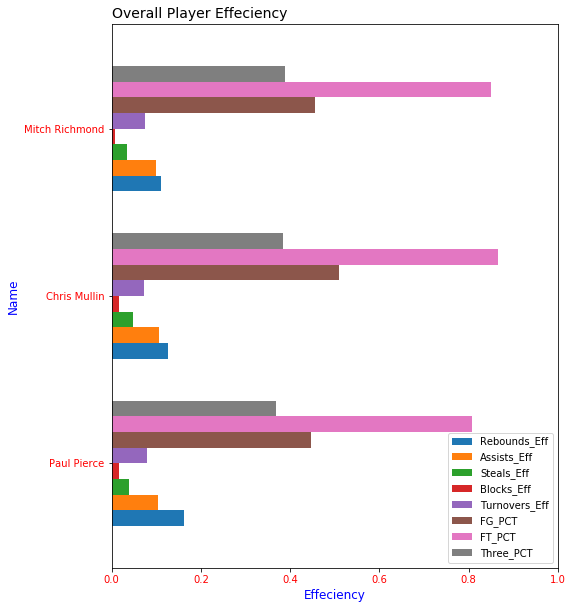

In [524]:
fig, ax = plt.subplots()

New_DF_2.plot(ax=ax, kind='barh',figsize=(8,10), width=.75)


ax.set_title('Overall Player Effeciency', fontsize=14, loc='left')

ax.set_ylabel('Name',color='blue',fontsize=12)
ax.set_xlabel('Effeciency',color='blue',fontsize=12)



ax.set_xlim(0,1)                 # shrink x axis limits
#ax.set_ylim(0,16000)

ax.tick_params(axis='x',labelcolor='red')
ax.tick_params(axis='y',labelcolor='red')

#ax.get_children()[list(us.columns).index('gdp')].set_color('r')
#ax.get_children()[list(us.columns).index('pce')].set_color('g')

ax.legend(loc='lower right')   